In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
import ipywidgets as widgets

# Joint distributions across time points


In [19]:
T_MEAS = np.array([0, 0.5, 1, 2, 4])
sns.set_context('talk')
sns.set(style='darkgrid')
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
def load_data(condition, replica=-1):
    if condition == 'NoDrug':
        cond = 'NoInhibitors'
    elif condition == 'MG':
        cond = 'MG'
    elif condition == 'U0126':
        cond = 'U0126'
    else:
        cond = 'MG_U0126'   
        
    if replica == -1:
        repstr=''
    else:
        repstr= f'_{str(replica)}'

    # 1st row IL1beta, 2nd row TNFalpha
    data = loadmat("Data/FinalDataAll.mat")
    obsr_tags = ['0hr', '30mins', '1hr', '2hr', '4hr']
    data_snapshots = []    
    for i in range(0, len(obsr_tags)):
        X = data['outputs_' + obsr_tags[i] + '_' + cond + repstr]
        X = np.ascontiguousarray(X[0:2, :])
        data_snapshots.append(X)
    return data_snapshots

def plot_joint_measurements(time_point=0, condition='No inhibitors'):
    cond_dict = dict({'No inhibitors': 'NoDrug', 'MG' : 'MG', 'U0126' : 'U0126', 'Both' : 'MG_U0126'})
    X = load_data(cond_dict[condition])
    h = sns.jointplot(x = X[time_point][0,:], y = X[time_point][1,:], kind='scatter')
    h.ax_joint.set_xlabel('IL1b')
    h.ax_joint.set_ylabel('TNFa')
    h.ax_joint.set_xlim([0, 1250])
    h.ax_joint.set_ylim([0, 1250])
    pos = h.ax_joint.get_position()
    h.ax_joint.text(pos.x0 + 0.5*pos.width, pos.y0 + pos.height*0.5, 
                 f'{str(T_MEAS[time_point])} hr \n {len(X[time_point][0,:])} cells', fontsize=15)
    h.fig.savefig(f'data_joint_{time_point}_{cond_dict[condition]}.pdf')

cond_dd = widgets.Dropdown(
    options=['No inhibitors', 'MG', 'U0126', 'Both'],
    value='No inhibitors',
    description='Condition:',
    disabled=False,
)



In [20]:
widgets.interact(plot_joint_measurements, time_point = widgets.IntSlider(min=0, max=4, step=1, value=0), condition = cond_dd); 

interactive(children=(IntSlider(value=0, description='time_point', max=4), Dropdown(description='Condition:', …

In [14]:
9*2000*2000



36000000

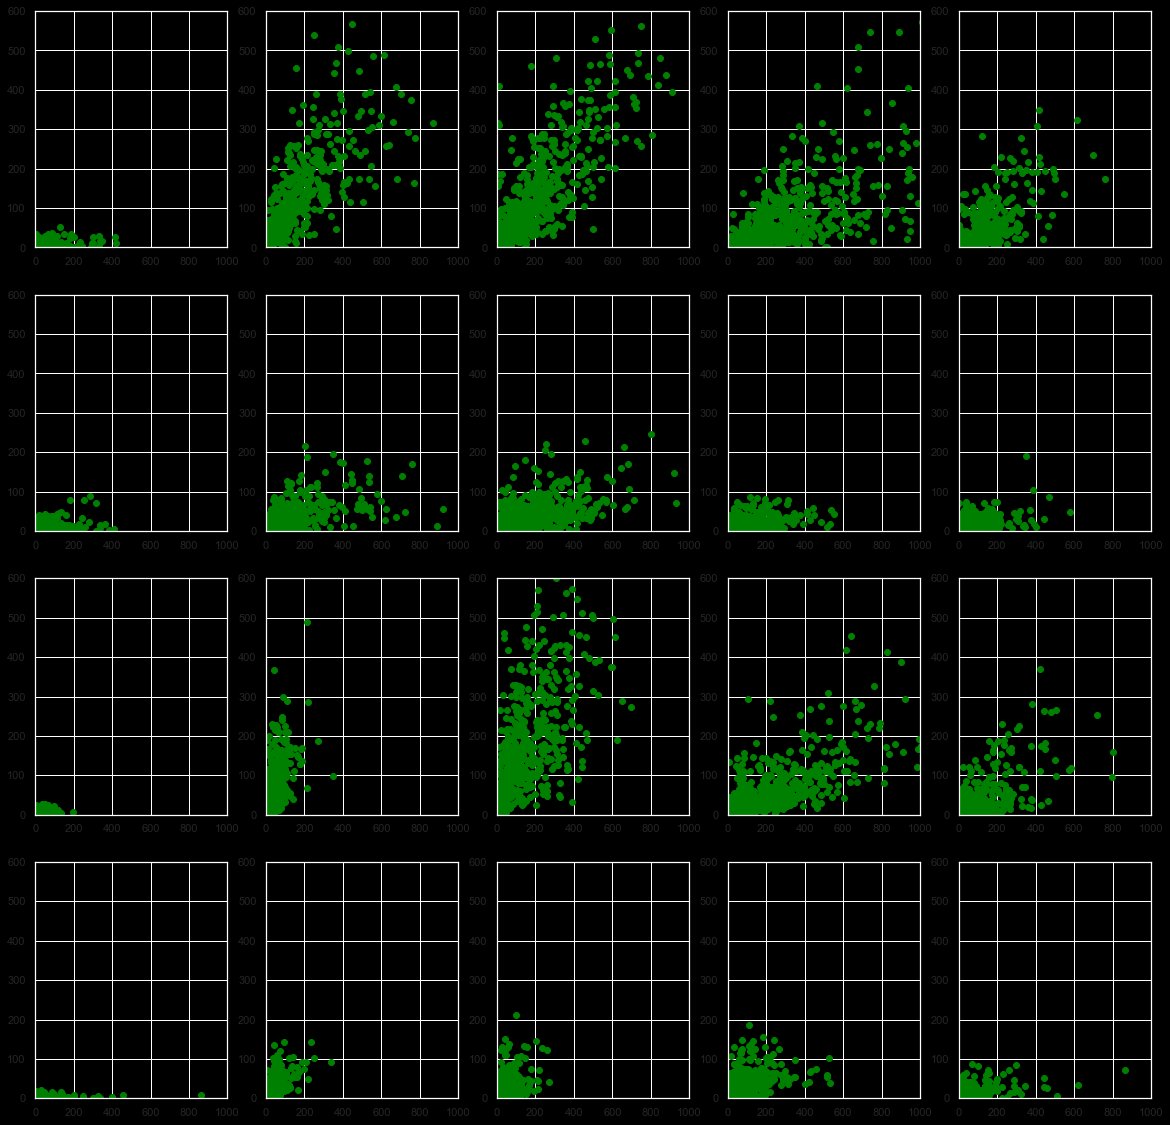

In [44]:
sns.set_context('talk')
sns.set(style='darkgrid')
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

conds = ['No inhibitors', 'MG', 'U0126', 'Both']
cond_dict = dict({'No inhibitors': 'NoDrug', 
                  'MG' : 'MG', 
                  'U0126' : 'U0126', 
                  'Both' : 'MG_U0126'})

fig, axs = plt.subplots(len(conds), len(T_MEAS))
fig.set_size_inches(20, 20)

for ic in range(0, len(conds)): 
    X = load_data(cond_dict[conds[ic]], 0)
    for it in range(0, len(T_MEAS)):        
        axs[ic, it].scatter(X[it][0,:], X[it][1,:], color='green')
        axs[ic, it].set_xlim([0, 1000])
        axs[ic, it].set_ylim([0, 600])
        
fig.savefig('joint_data_visual.pdf', bbox_inches='tight')

AttributeError: 'dict_keys' object has no attribute 'key'